In [2]:
import numpy as np
import spikeinterface as si
import os

In [3]:
path = '/itet-stor/kvulic/neuronies/single_neurons/1_Subprojects/Small_Network_Plasticity/3_Processed_Data/BCM_Test/Sorters/'
data = np.load(path + 'ID1821_1_DIV45_DATE20240405_0849_spontaneous_after_BCMFreq_Freq80.raw_processed.pkl', allow_pickle=True)   

In [24]:
data

{'CHIP_ID': 1821,
 'NW_ID': 1,
 'DIV': 45,
 'EXPERIMENT_DURATION': 206.76,
 'SPIKEMAT_EXTREMUM': array([('18117', 2.3000000e+00,  569), ('13301', 3.1500000e+00, 1215),
        ('17891', 4.5500000e+00,  876), ...,
        ('17480', 2.0675470e+05, 1018), ('8886', 2.0675735e+05, 1283),
        ('15023', 2.0675745e+05, 1228)],
       dtype=[('Electrode', '<U10'), ('Spike_Time', '<f8'), ('Unit_Id', '<i4')]),
 'SPIKEMAT': array([('19443', 1.000000e-01, -15.08493805),
        ('19663', 1.500000e-01, -11.89923   ),
        ('19003', 1.500000e-01, -27.14669609), ...,
        ('9108', 2.067595e+05, -16.80015373),
        ('15023', 2.067597e+05, -33.27707672),
        ('9328', 2.067597e+05, -13.04605865)],
       dtype=[('Electrode', '<U10'), ('Spike_Time_ms', '<f8'), ('Amplitude_uV', '<f8')]),
 'UNIT_TO_EL': {13: [12172,
   9971,
   10851,
   11512,
   9317,
   12392,
   9537,
   9751,
   13052,
   11077,
   13272,
   8871,
   8651,
   9091,
   10631,
   10417,
   10632,
   10197,
   8657,
   10

In [35]:
data['SPIKEMAT_EXTREMUM']
a=0
units = []
for row in data['SPIKEMAT_EXTREMUM']:
    if row[0] == '9097':

        units.append(row[2])
        print(row)
        a+=1
print(a)

('9097', 17.05, 92)
('9097', 39.35, 92)
('9097', 186.85, 690)
('9097', 252.35, 456)
('9097', 1768.25, 690)
('9097', 1867.45, 690)
('9097', 1933.9, 403)
('9097', 1968.9, 456)
('9097', 2017.7, 403)
('9097', 2066.55, 690)
('9097', 2222.45, 456)
('9097', 2276., 456)
('9097', 2563.95, 403)
('9097', 2648.3, 403)
('9097', 2673.1, 858)
('9097', 2742.55, 456)
('9097', 2797.8, 690)
('9097', 2829.15, 858)
('9097', 2837.8, 858)
('9097', 2919.45, 403)
('9097', 2920.2, 403)
('9097', 4380.3, 690)
('9097', 4790.55, 92)
('9097', 4791.5, 92)
('9097', 4831.6, 456)
('9097', 4867.1, 456)
('9097', 4927.25, 456)
('9097', 4990.95, 403)
('9097', 5031.3, 690)
('9097', 5077., 403)
('9097', 5077.7, 456)
('9097', 5196.1, 456)
('9097', 5239.4, 403)
('9097', 5291.5, 403)
('9097', 5589.75, 858)
('9097', 5624.05, 456)
('9097', 5679.8, 403)
('9097', 5708.35, 690)
('9097', 5721.7, 456)
('9097', 7508.5, 690)
('9097', 7516.6, 456)
('9097', 7547.95, 690)
('9097', 7570.8, 858)
('9097', 7612.15, 690)
('9097', 7660.05, 403)
(

In [36]:
np.unique(units)

array([ 92, 403, 456, 690, 858], dtype=int32)

(array([0, 1, 2, 2]), array([0, 1, 0, 1]))


In [3]:
for i in dir(si.SortingAnalyzer):
    if not i.startswith('_'):
        print(i)


channel_ids
channel_ids_to_indices
compute
compute_one_extension
compute_several_extensions
copy
create
create_binary_folder
create_memory
create_zarr
delete_extension
get_channel_locations
get_computable_extensions
get_default_extension_params
get_dtype
get_extension
get_loaded_extension_names
get_num_channels
get_num_samples
get_num_segments
get_num_units
get_probe
get_probegroup
get_recording_property
get_saved_extension_names
get_sorting_property
get_sorting_provenance
get_total_duration
get_total_samples
has_extension
has_recording
has_temporary_recording
is_filtered
is_read_only
is_sparse
load
load_all_saved_extension
load_extension
load_from_binary_folder
load_from_zarr
merge_units
recording
remove_units
sampling_frequency
save_as
select_units
set_temporary_recording
unit_ids


In [4]:
analyzer_path = '/itet-stor/kvulic/neuronies/single_neurons/1_Subprojects/Small_Network_Plasticity/3_Processed_Data/BCM_Test/Sorters/Sorter_ID1821_1_DIV45_DATE20240405_0849_spontaneous_after_BCMFreq_Freq80.raw.h5/analyzer_curated/'
analyzer = si.load_sorting_analyzer(analyzer_path)

In [5]:
channel_ids = analyzer.channel_ids
len(channel_ids)
channel_inds = analyzer.channel_ids_to_indices(channel_ids)

In [6]:
type(channel_inds[0])

numpy.int64

In [7]:
len(analyzer.unit_ids)

182

In [10]:
extremum_channel = si.get_template_extremum_channel(analyzer, outputs = 'index')

In [16]:
len(extremum_channel)

182

In [18]:

unique_extremum_channel = {}
seen_values = set()
for key, value in extremum_channel.items():
    if value not in seen_values:
        unique_extremum_channel[key] = value
        seen_values.add(value)
unique_extremum_channel
unique_extremum_channel_keys = list(unique_extremum_channel.keys())
unique_extremum_channel_keys

[13,
 92,
 94,
 101,
 122,
 125,
 157,
 225,
 281,
 327,
 374,
 421,
 439,
 444,
 467,
 469,
 481,
 518,
 527,
 534,
 538,
 560,
 569,
 592,
 613,
 626,
 659,
 684,
 689,
 694,
 700,
 722,
 727,
 734,
 741,
 762,
 780,
 782,
 806,
 847,
 856,
 870,
 896,
 947,
 1031,
 1045,
 1049,
 1058,
 1123,
 1130,
 1145,
 1151,
 1171,
 1201,
 1214,
 1228,
 1234,
 1235,
 1243,
 1244,
 1246,
 1252,
 1268,
 1271,
 1272,
 1274,
 1275,
 1285,
 1286]

In [4]:
sorter_path = '/itet-stor/kvulic/neuronies/single_neurons/3_Student_Projects/Amelie/Processed_data/Chip1908/Chip1908_DIV16/'

In [11]:
sorters = [d for d in os.listdir(sorter_path) if os.path.isdir(os.path.join(sorter_path, d))]
sorters = sorted(sorters)
sorters = sorters[1:]

In [ ]:
amplitudes = []
for folder in sorters:
    try:
        analyzer_path = os.path.join(sorter_path, folder, 'analyzer_curated')
        analyzer = si.load_sorting_analyzer(analyzer_path, format = 'binary_folder')
        amplitudes.append(analyzer.get_extension("spike_amplitudes").get_data(outputs="by_unit"))
    except UnicodeDecodeError as e:
        print(f"Encoding error in folder {folder}: {e}")
    except Exception as e:
        print(f"Error in folder {folder}: {e}")
        
   


Encoding error in folder Sorter_ID1908_N3_DIV16_DATE20241108_0905_spontaneous_NGN2.raw.h5: 'utf-8' codec can't decode byte 0xb0 in position 37: invalid start byte
Encoding error in folder Sorter_ID1908_N5_DIV16_DATE20241108_0905_spontaneous_NGN2.raw.h5: 'utf-8' codec can't decode byte 0xb0 in position 37: invalid start byte
Encoding error in folder Sorter_ID1908_N6_DIV16_DATE20241108_0905_spontaneous_NGN2.raw.h5: 'utf-8' codec can't decode byte 0xb0 in position 37: invalid start byte


In [21]:
amplitude_numpy = np.load(os.path.join(sorter_path,sorters[0],'analyzer_curated/extensions/spike_amplitudes/amplitudes.npy'), allow_pickle=True)

In [27]:
amplitude_numpy.shape

(5102,)

In [28]:
5102/61

83.63934426229508

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pedot = pd.read_csv('/itet-stor/kvulic/neuronies/kvulic_project1/Maxwell/PEDOT/Processed_data/Sorter_ID10824_N1_DIV29_DATE20241121_1814_spontaneous_PEDOT_single.raw.h5/clustering_metrics.csv')
no_pedot = pd.read_csv('/itet-stor/kvulic/neuronies/kvulic_project1/Maxwell/PEDOT/Processed_data/Sorter_ID2191_N3_DIV42_DATE20241121_1838_spontaneous_NO_PEDOT_single.raw.h5/clustering_metrics.csv')

In [3]:
pedot

,Unnamed: 0,amplitude_cutoff,amplitude_cv,amplitude_median,drift_ptp,drift_std,drift_mad,firing_range,firing_rate,isi_violations_ratio,...,num_spikes,presence_ratio,rp_contamination,rp_violations,sd_ratio,sliding_rp_violation,snr,sync_spike_2,sync_spike_4,sync_spike_8
0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.20,0.037010,0.0,...,3.0,1.0,0.0,0.0,NaN,NaN,11.423688,0.000000,0.0,0.0
1,1,NaN,NaN,NaN,NaN,NaN,NaN,1.20,0.333087,0.0,...,27.0,1.0,0.0,0.0,NaN,NaN,2.797834,0.000000,0.0,0.0
2,2,NaN,NaN,NaN,NaN,NaN,NaN,1.35,0.666173,0.0,...,54.0,1.0,0.0,0.0,NaN,NaN,1.768310,0.055556,0.0,0.0
3,3,NaN,NaN,NaN,NaN,NaN,NaN,0.65,0.246731,0.0,...,20.0,1.0,0.0,0.0,NaN,NaN,6.895434,0.000000,0.0,0.0
4,4,NaN,NaN,NaN,NaN,NaN,NaN,0.70,0.320750,0.0,...,26.0,1.0,0.0,0.0,NaN,NaN,2.184329,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,782,NaN,NaN,NaN,NaN,NaN,NaN,1.65,1.492721,0.0,...,121.0,1.0,0.0,0.0,NaN,NaN,7.548782,0.016529,0.0,0.0
662,783,NaN,NaN,NaN,NaN,NaN,NaN,0.65,0.456452,0.0,...,37.0,1.0,0.0,0.0,NaN,NaN,3.148922,0.081081,0.0,0.0
663,784,NaN,NaN,NaN,NaN,NaN,NaN,1.65,1.542068,0.0,...,125.0,1.0,0.0,0.0,NaN,NaN,31.145725,0.032000,0.0,0.0
664,785,NaN,NaN,NaN,NaN,NaN,NaN,1.85,2.306933,0.0,...,187.0,1.0,0.0,0.0,NaN,0.27,19.107650,0.026738,0.0,0.0


In [10]:
pedot['snr'].max(), no_pedot['snr'].max()

(46.226032, 5000.749)

<Figure size 1000x600 with 0 Axes>

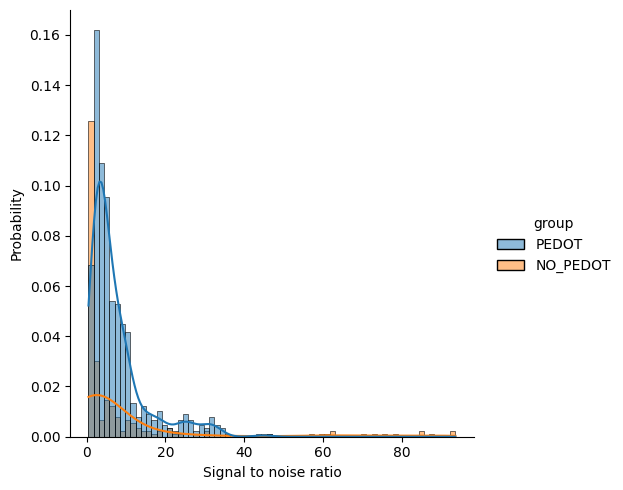

In [13]:
import seaborn as sns

plt.figure(figsize=(10, 6))
filtered_pedot = pedot[pedot['snr'] <= 100]
filtered_no_pedot = no_pedot[no_pedot['snr'] <= 100]

sns.displot(pd.concat([filtered_pedot.assign(group='PEDOT'), filtered_no_pedot.assign(group='NO_PEDOT')]), 
    x = "snr", hue = "group", stat = "probability", kde = True)
plt.xlabel('Signal to noise ratio')
plt.show()

In [19]:
pedot_pickle = pd.read_pickle('/itet-stor/kvulic/neuronies/kvulic_project1/Maxwell/PEDOT/Processed_data/ID10824_N2_DIV29_DATE20241121_1814_spontaneous_PEDOT_single.raw_processed.pkl')
no_pedot_pickle = pd.read_pickle('/itet-stor/kvulic/neuronies/single_neurons/3_Student_Projects/Amelie/Processed_data/Chip1908/Chip1908_DIV28/ID1908_N3_DIV28_DATE20241120_1034_spontaneous_NGN2.raw_processed.pkl')

In [24]:
pedot_pickle['SPIKEMAT']

array([('2716', 3.000000e-01, -14.27281666),
       ('3376', 3.000000e-01, -13.00641823),
       ('2935', 3.000000e-01, -13.25775909), ...,
       ('6891', 7.917910e+04, -12.15435886),
       ('7331', 7.917915e+04, -11.82152557),
       ('8453', 7.917920e+04,  -8.92667198)],
      dtype=[('Electrode', '<U10'), ('Spike_Time_ms', '<f8'), ('Amplitude_uV', '<f8')])

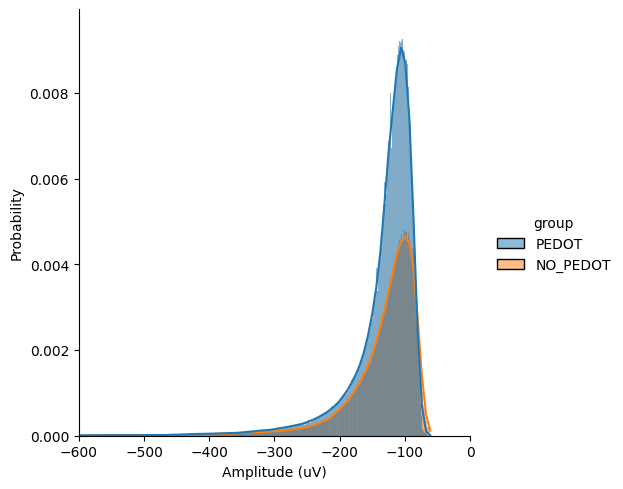

In [26]:
pedot_pickle, no_pedot_pickle
amplitudes_pedot = pd.DataFrame(pedot_pickle['SPIKEMAT'], columns=['ID', 'Time', 'Amplitude_uV'])
amplitudes_no_pedot = pd.DataFrame(no_pedot_pickle['SPIKEMAT'], columns=['ID', 'Time', 'Amplitude_uV'])
amplitudes_pedot['Amplitude_uV'] *= 10
amplitudes_no_pedot['Amplitude_uV'] *= 10
sns.displot(pd.concat([amplitudes_pedot[['Amplitude_uV']].assign(group='PEDOT'), 
                       amplitudes_no_pedot[['Amplitude_uV']].assign(group='NO_PEDOT')]), 
            x="Amplitude_uV", hue="group", stat="probability", kde=True)
plt.xlabel('Amplitude (uV)')
plt.xlim(-600,0)
plt.show()

Spike counts per electrode (PEDOT):
Electrode
2079     501
2291      82
2292    1071
2293      82
2294     857
        ... 
8658    1058
8660      82
8661    1145
8662    1692
8665      86
Length: 701, dtype: int64

Spike frequency per electrode (PEDOT):
Electrode
2079     6.327355
2291     1.035615
2292    13.526143
2293     1.035615
2294    10.823440
          ...    
8658    13.361960
8660     1.035615
8661    14.460722
8662    21.369033
8665     1.086133
Length: 701, dtype: float64

Spike counts per electrode (NO PEDOT):
Electrode
1056    1456
1058     548
1066      69
1068     303
1070     721
        ... 
855      451
857      761
863      695
875     1378
879      399
Length: 547, dtype: int64

Spike frequency per electrode (NO PEDOT):
Electrode
1056    16.083066
1058     6.053242
1066     0.762178
1068     3.346957
1070     7.964211
          ...    
855      4.981774
857      8.406053
863      7.677013
875     15.221474
879      4.407379
Length: 547, dtype: float64


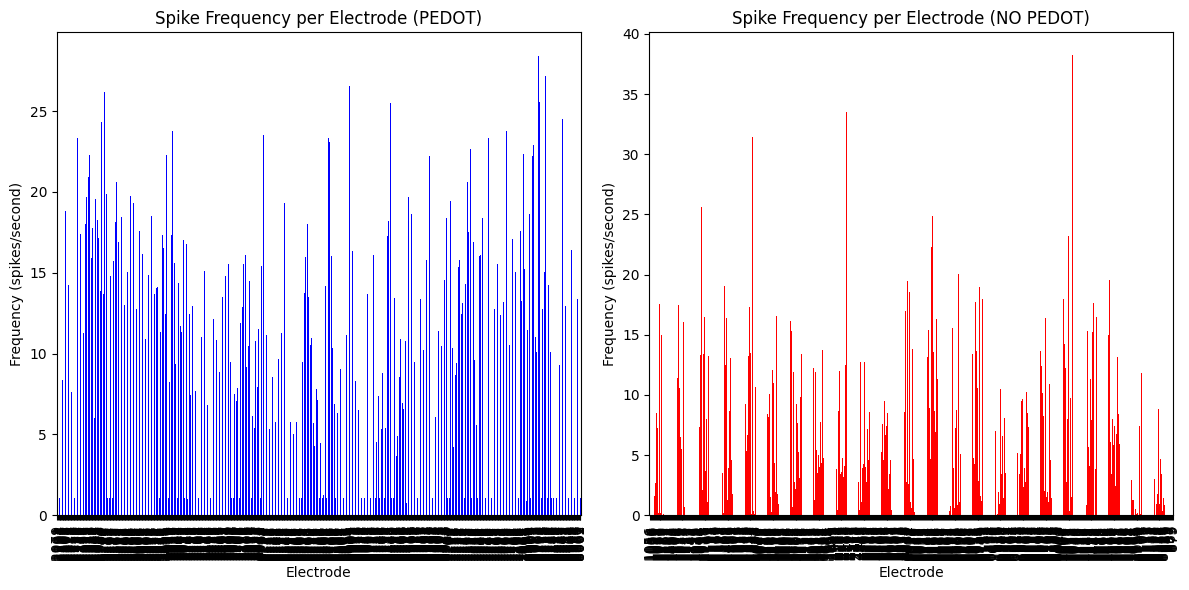

In [23]:
# Extract SPIKEMAT data
spikemat_pedot = pedot_pickle['SPIKEMAT']
spikemat_no_pedot = no_pedot_pickle['SPIKEMAT']

# Calculate number of spikes per electrode
spike_counts_pedot = pd.DataFrame(spikemat_pedot, columns=['Electrode', 'Time', 'Amplitude']).groupby('Electrode').size()
spike_counts_no_pedot = pd.DataFrame(spikemat_no_pedot, columns=['Electrode', 'Time', 'Amplitude']).groupby('Electrode').size()

# Calculate frequency of spiking (spikes per second)
experiment_duration_pedot = pedot_pickle['EXPERIMENT_DURATION']
experiment_duration_no_pedot = no_pedot_pickle['EXPERIMENT_DURATION']

spike_frequency_pedot = spike_counts_pedot / experiment_duration_pedot
spike_frequency_no_pedot = spike_counts_no_pedot / experiment_duration_no_pedot

# Display results
print("Spike counts per electrode (PEDOT):")
print(spike_counts_pedot)
print("\nSpike frequency per electrode (PEDOT):")
print(spike_frequency_pedot)

print("\nSpike counts per electrode (NO PEDOT):")
print(spike_counts_no_pedot)
print("\nSpike frequency per electrode (NO PEDOT):")
print(spike_frequency_no_pedot)
# Plot spike frequency per electrode
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
spike_frequency_pedot.plot(kind='bar', color='blue')
plt.title('Spike Frequency per Electrode (PEDOT)')
plt.xlabel('Electrode')
plt.ylabel('Frequency (spikes/second)')

plt.subplot(1, 2, 2)
spike_frequency_no_pedot.plot(kind='bar', color='red')
plt.title('Spike Frequency per Electrode (NO PEDOT)')
plt.xlabel('Electrode')
plt.ylabel('Frequency (spikes/second)')

plt.tight_layout()
plt.show()